### Aim of the project :

Predict employee attrition based on various factors related to personal and professional attributes.

#### Problem Statement:

Acme Corporation, a leading tech company, is facing a significant challenge with employee turnover. The HR department is concerned about the increasing rate of attrition, as it negatively impacts team dynamics, project continuity, and overall company morale. To address this issue, Acme Corporation wants to leverage data analytics and machine learning to understand the factors influencing employee turnover and predict which employees are likely to leave in the near future.

### Loading packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
pd.set_option('display.max_columns',None)

### Data Structure and Content

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 35)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Missing values and duplicates:


In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.duplicated().sum()

0

We have confirmed that there are no missing values and duplicate values in the dataset. Therefore, there is no need for further imputation or handling of missing data and duplicates.

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Outliers

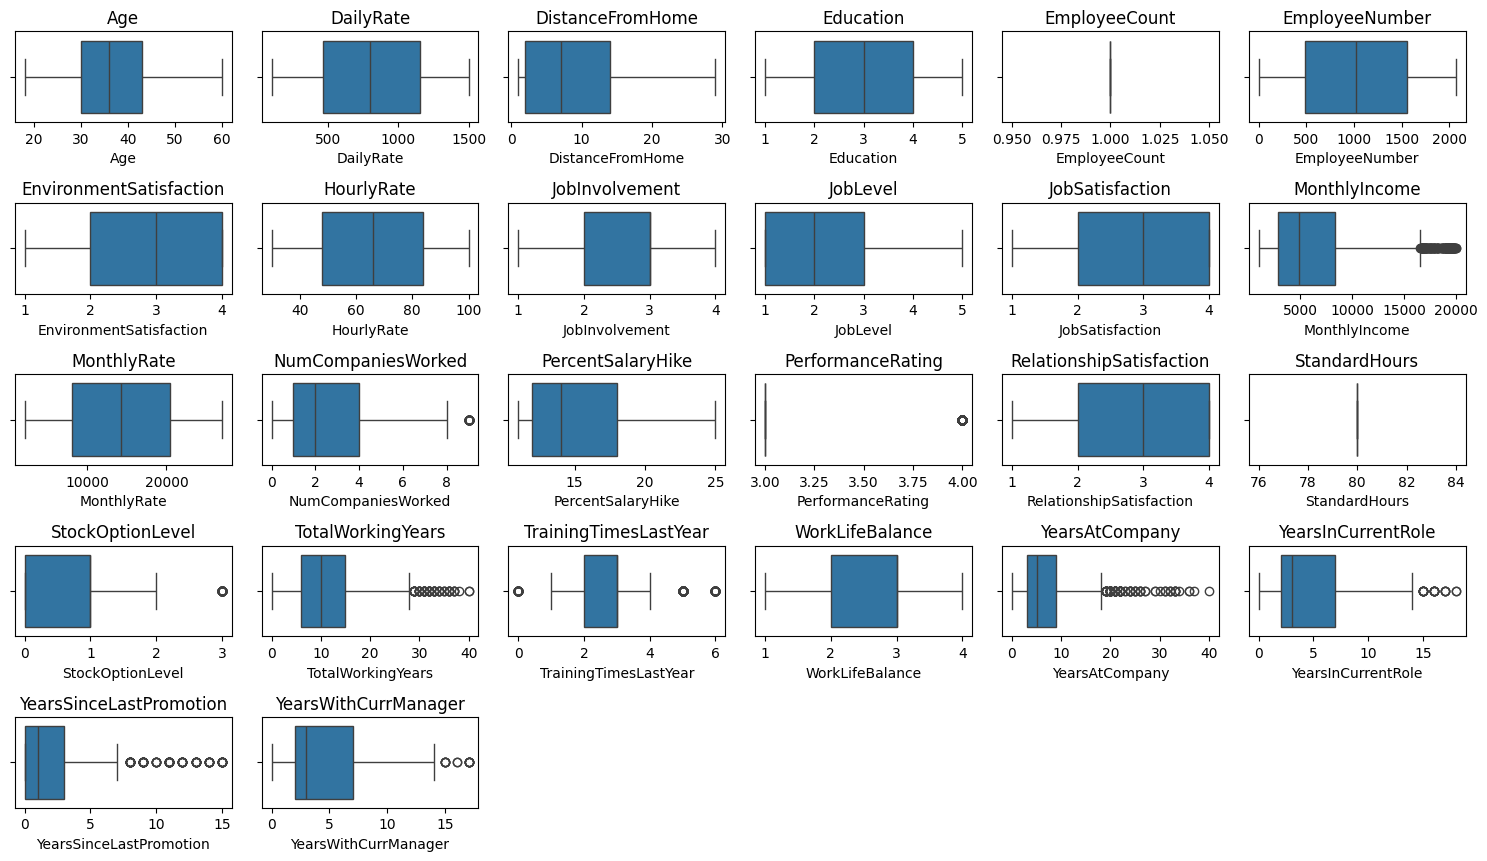

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()

### EDA

#### Bivariate Analysis

Text(0.5, 1.0, 'Attrition by Age')

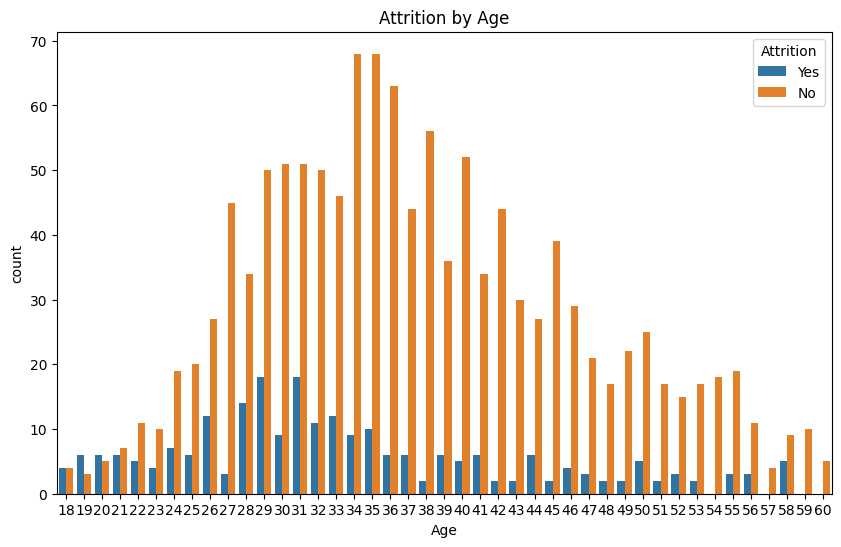

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Attrition', data=df)
plt.title('Attrition by Age')



*  We can see that most of the employees of the company are in the age group are of 34-38



In [13]:
age_attrition_counts = df.groupby(['Age', 'Attrition']).size().unstack(fill_value=0)

age_attrition_counts['Total'] = age_attrition_counts.sum(axis=1)
age_attrition_counts['Attrition_Percentage'] = (age_attrition_counts['Yes'] / age_attrition_counts['Total']) * 100

Text(0.5, 1.0, 'Attrition Percentage by Age')

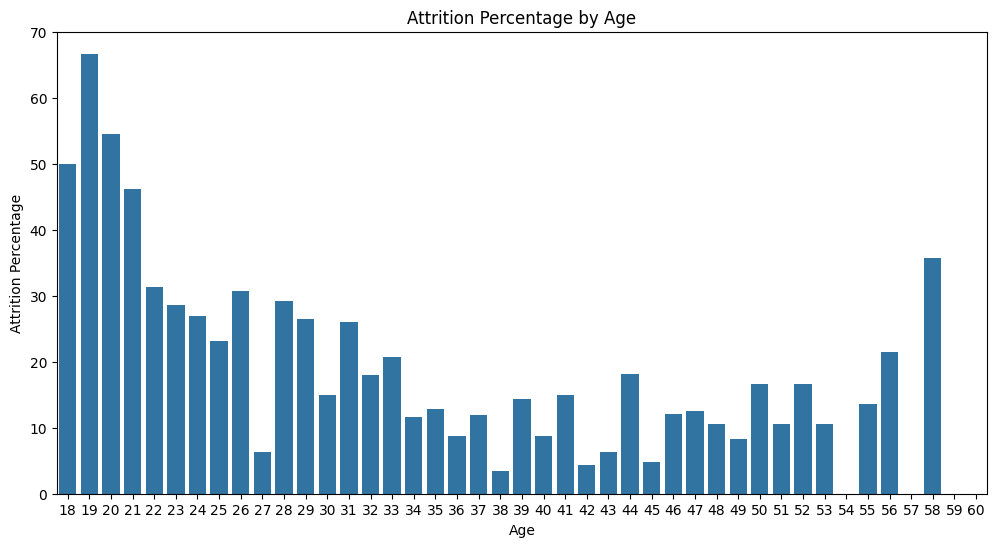

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Attrition_Percentage', data=age_attrition_counts)
plt.xlabel('Age')
plt.ylabel('Attrition Percentage')
plt.title('Attrition Percentage by Age')



*   We can observe that relative percentage of the employees who are leaving the company are in the age group of 18-21.



Text(0.5, 1.0, 'Relative Effect of Business Travel on Employee Attrition')

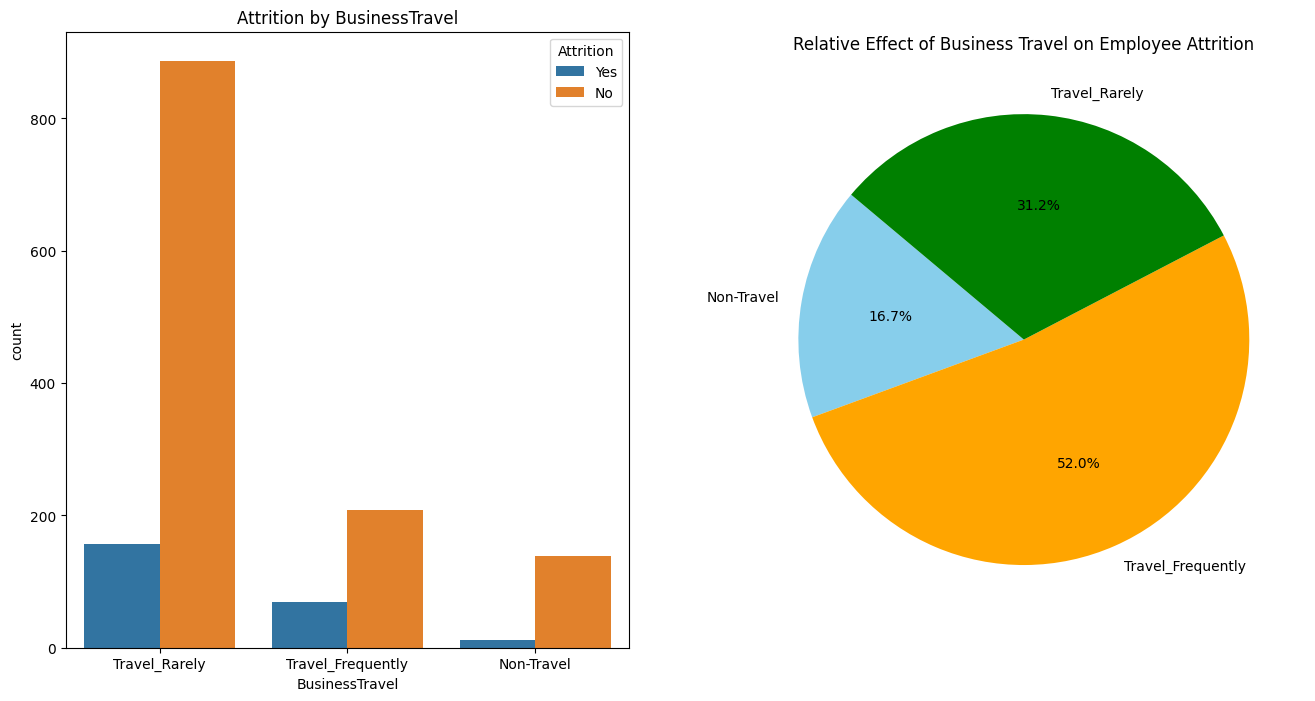

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(x='BusinessTravel', hue='Attrition', data=df, ax=axs[0])
axs[0].set_title('Attrition by BusinessTravel')

travel_attrition_counts = df.groupby(['BusinessTravel', 'Attrition']).size().unstack(fill_value=0)

travel_attrition_counts['Total'] = travel_attrition_counts.sum(axis=1)
travel_attrition_counts['Attrition_Percentage'] = (travel_attrition_counts['Yes'] / travel_attrition_counts['Total']) * 100

labels = travel_attrition_counts.index
sizes = travel_attrition_counts['Attrition_Percentage']

axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green'])
axs[1].set_title('Relative Effect of Business Travel on Employee Attrition')


*   We observe that employees who travel rarely are leaving the company more frequently compared to those who travel often or not at all.
*  However when examining the relative effect of business travel on employee attrition, it is evident that around 50% of the employees who travel frequently are leaving the company.




Text(0.5, 1.0, 'Attrition by Department')

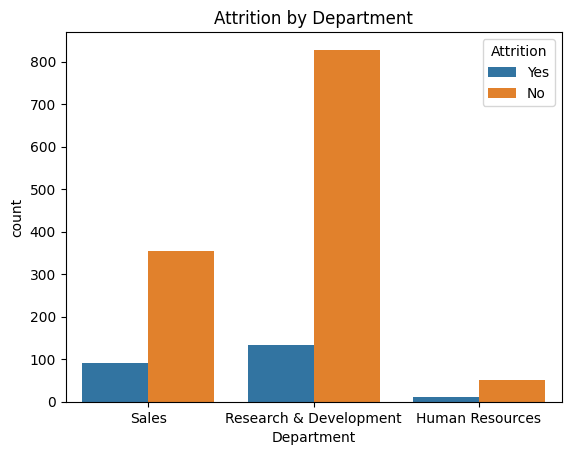

In [16]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')



*   We can see that most of the employees leaving the company are from the Research & Development department. However, the highest percentage of employees leaving are from the Sales and HR departments.




Text(0.5, 1.0, 'Attrition Percentage by distance from home')

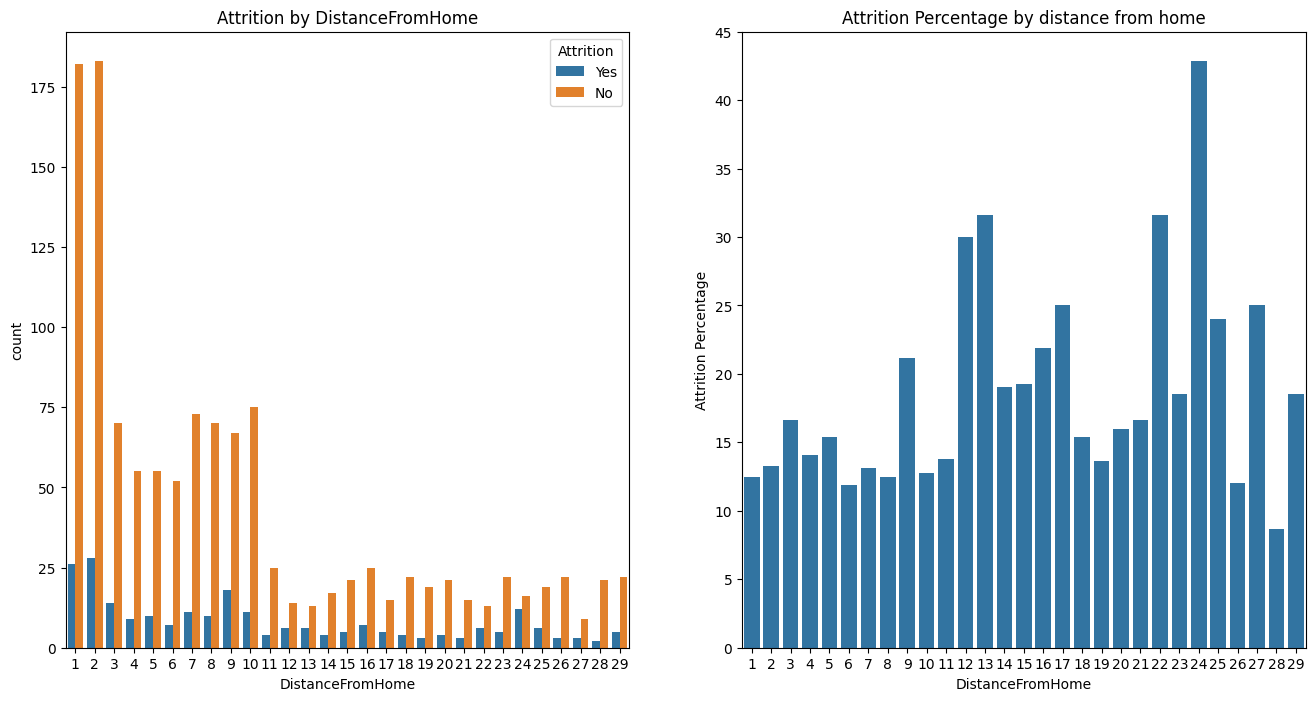

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.countplot(x='DistanceFromHome', hue='Attrition', data=df, ax=axs[0])
axs[0].set_title('Attrition by DistanceFromHome')

dist_attrition_counts = df.groupby(['DistanceFromHome', 'Attrition']).size().unstack(fill_value=0)

dist_attrition_counts['Total'] = dist_attrition_counts.sum(axis=1)
dist_attrition_counts['Attrition_Percentage'] = (dist_attrition_counts['Yes'] / dist_attrition_counts['Total']) * 100

sns.barplot(x='DistanceFromHome', y='Attrition_Percentage', data=dist_attrition_counts)
axs[1].set_xlabel('DistanceFromHome')
axs[1].set_ylabel('Attrition Percentage')
axs[1].set_title('Attrition Percentage by distance from home')


*   We can see that a significant percentage of employees who are leaving the company live far away. Therefore, distance might also be a factor contributing to employee attrition.


Text(0.5, 1.0, 'Attrition by Environment Satisfaction')

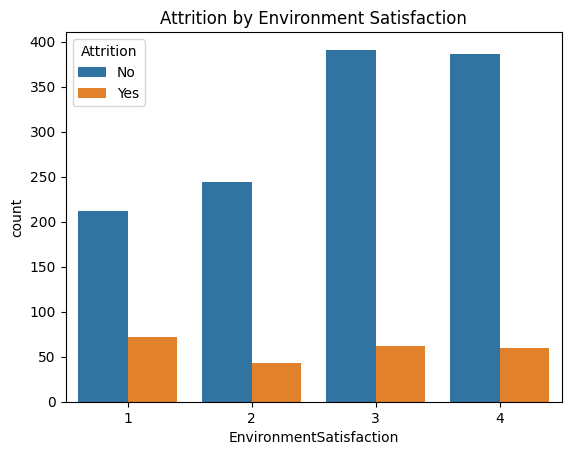

In [18]:
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Environment Satisfaction')

Text(0.5, 1.0, 'Attrition by Percent Salary Hike')

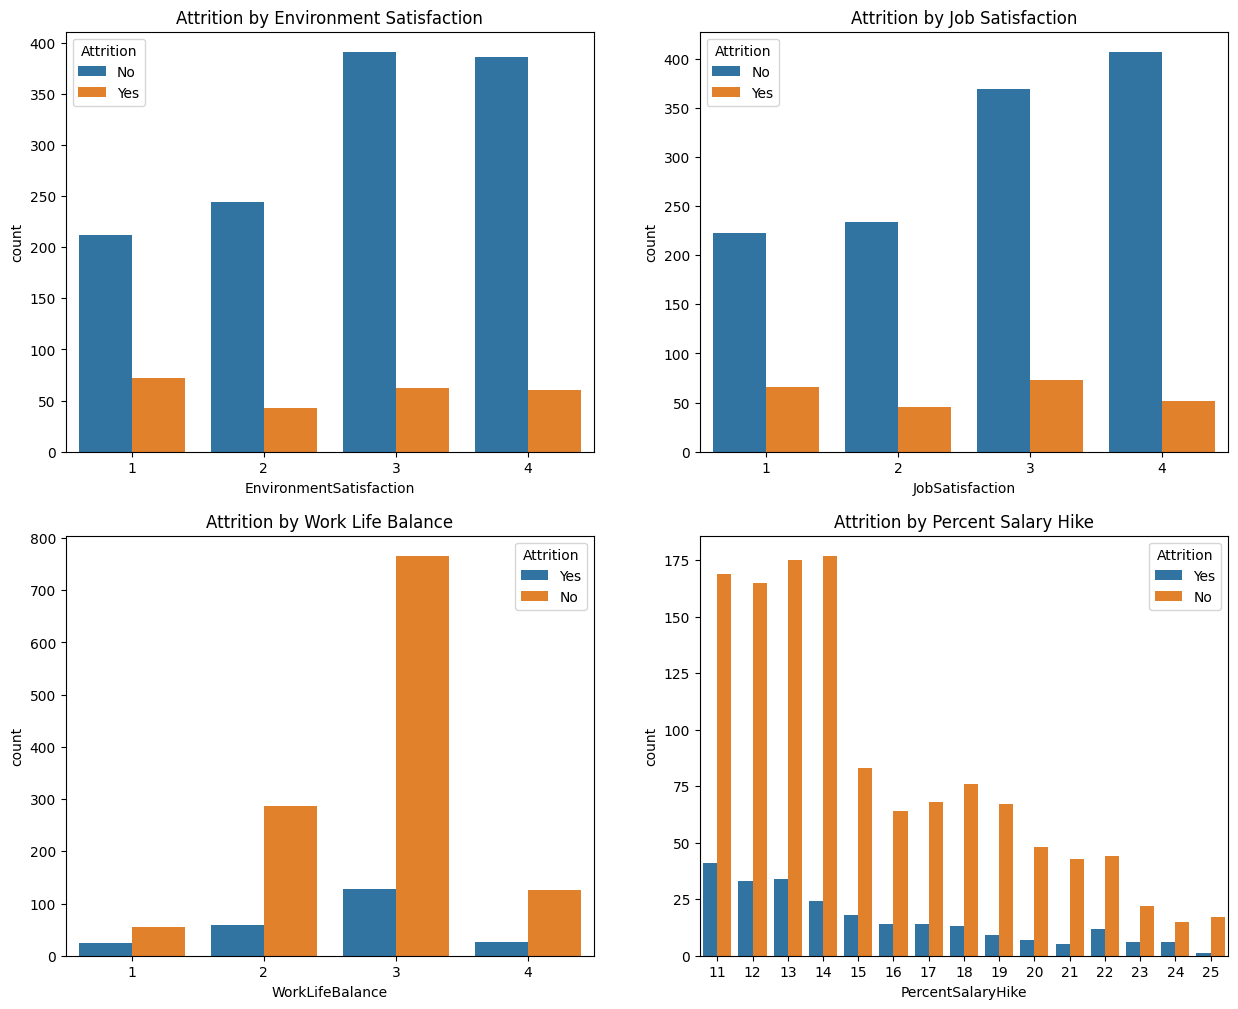

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Plot for Environment Satisfaction
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Attrition by Environment Satisfaction')

# Plot for Job Satisfaction
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Attrition by Job Satisfaction')

# Plot for Work Life Balance
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Attrition by Work Life Balance')

# Plot for Percent Salary Hike
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Attrition by Percent Salary Hike')



*   We can observe that employees who are dissatisfied with the work environment are more likely to leave the company compared to those who are satisfied with the work environment.



*   Similarly, employees who were not satisfied with their jobs left the company.

*  Employees who didn't feel good about their work-life balance tend to leave the company more often than those who were satisfied with their work-life balance.







Text(0.5, 1.0, 'Attrition by Marital Status')

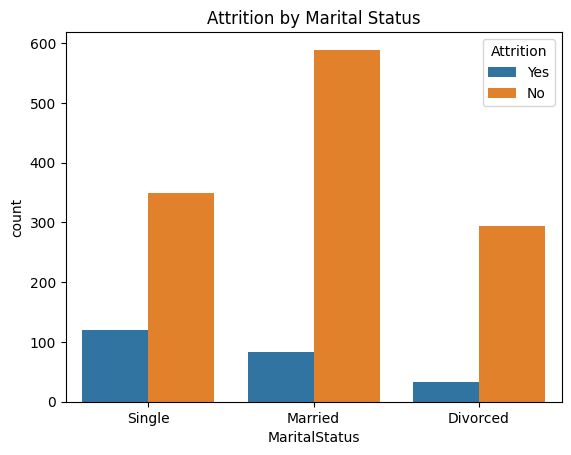

In [20]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Attrition by Marital Status')



*   We can see that most of the employees who left the company are single.



Text(0.5, 1.0, 'Attrition by Gender')

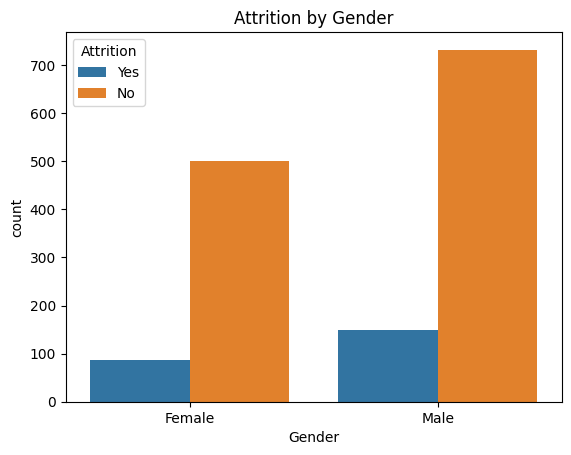

In [21]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition by Gender')

We can observe that most of the employees who leave the company are female.

Text(0.5, 1.0, 'Attrition by OverTime')

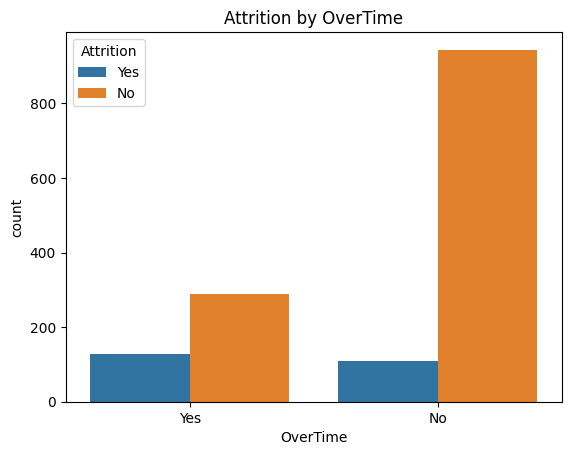

In [22]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by OverTime')

* From the plot above, we can clearly see that employees who worked overtime were more likely to leave the company. We should consider overtime as an important factor influencing employee attrition.

Text(0.5, 1.0, 'Attrition by Education Level')

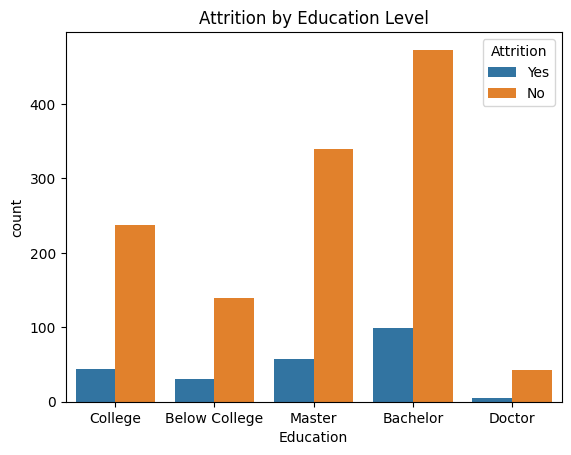

In [23]:
edu_map ={1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'}
sns.countplot(x=df['Education'].map(edu_map), hue='Attrition', data=df)
plt.title('Attrition by Education Level')

#### Univariate Analysis

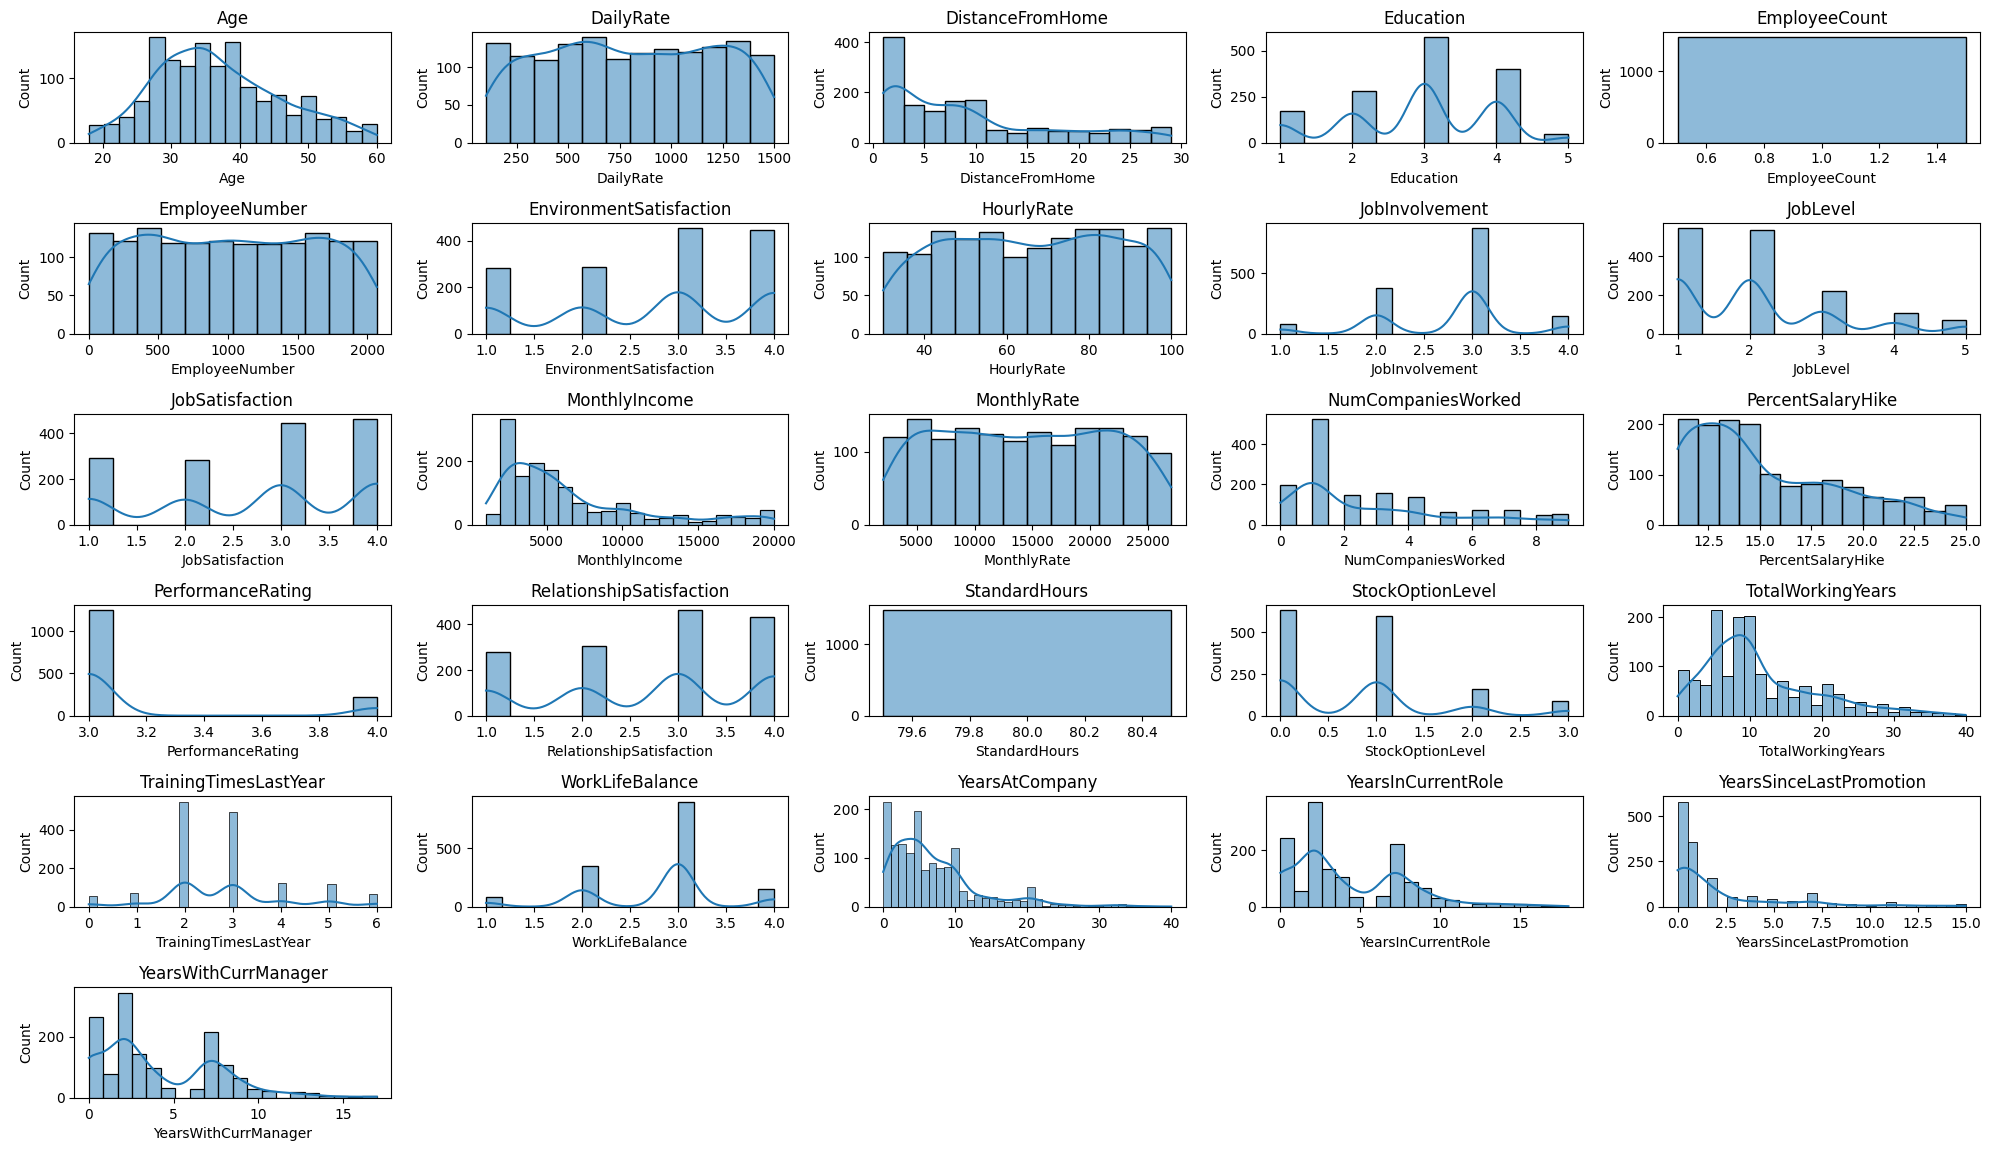

In [24]:
numerical_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(8,5, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()

#### Categorical variables:

In [25]:
for col in df.columns:
  if df[col].dtype == object:
    print(f"{col}: {df[col].unique()}")
    print(df[col].value_counts())
    print('----------------------------------')

Attrition: ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
----------------------------------
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
----------------------------------
Department: ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
----------------------------------
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
----------------------------------
Gender: ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
------------------------

Text(0.5, 1.0, 'Attrition Distribution')

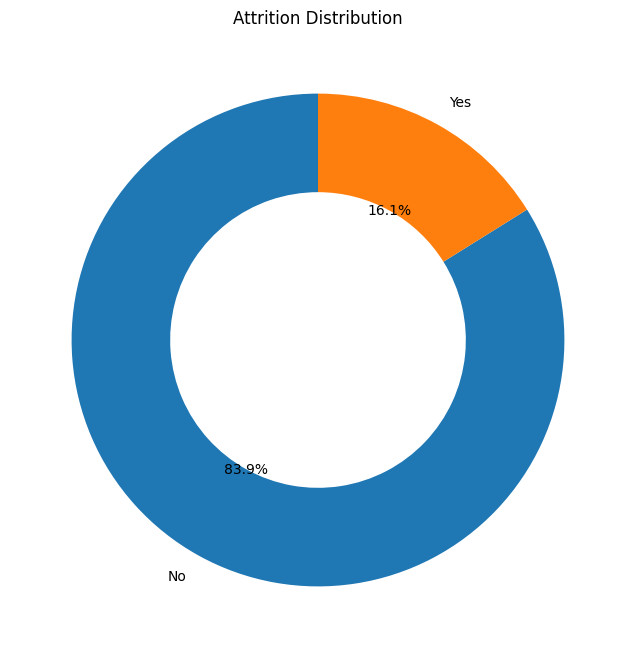

In [26]:
attrition_counts = df['Attrition'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

plt.title('Attrition Distribution')

The dataset is very imbalanced. So we should balance the dataset using SMOTE technique

### Preprocessing Data:

#### Encoding the variables:


##### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_enc = LabelEncoder()
df['Attrition'] = label_enc.fit_transform(df['Attrition'])
df['OverTime'] = label_enc.fit_transform(df['OverTime'])
df['Gender'] = label_enc.fit_transform(df['Gender'])
df['Over18'] = label_enc.fit_transform(df['Over18'])

##### OneHot Encoding

In [29]:
df= pd.get_dummies(df,columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)

dummy_columns = df.columns[df.columns.str.startswith(('BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'))]
df[dummy_columns] = df[dummy_columns].astype(int)

#### Univariate Analysis

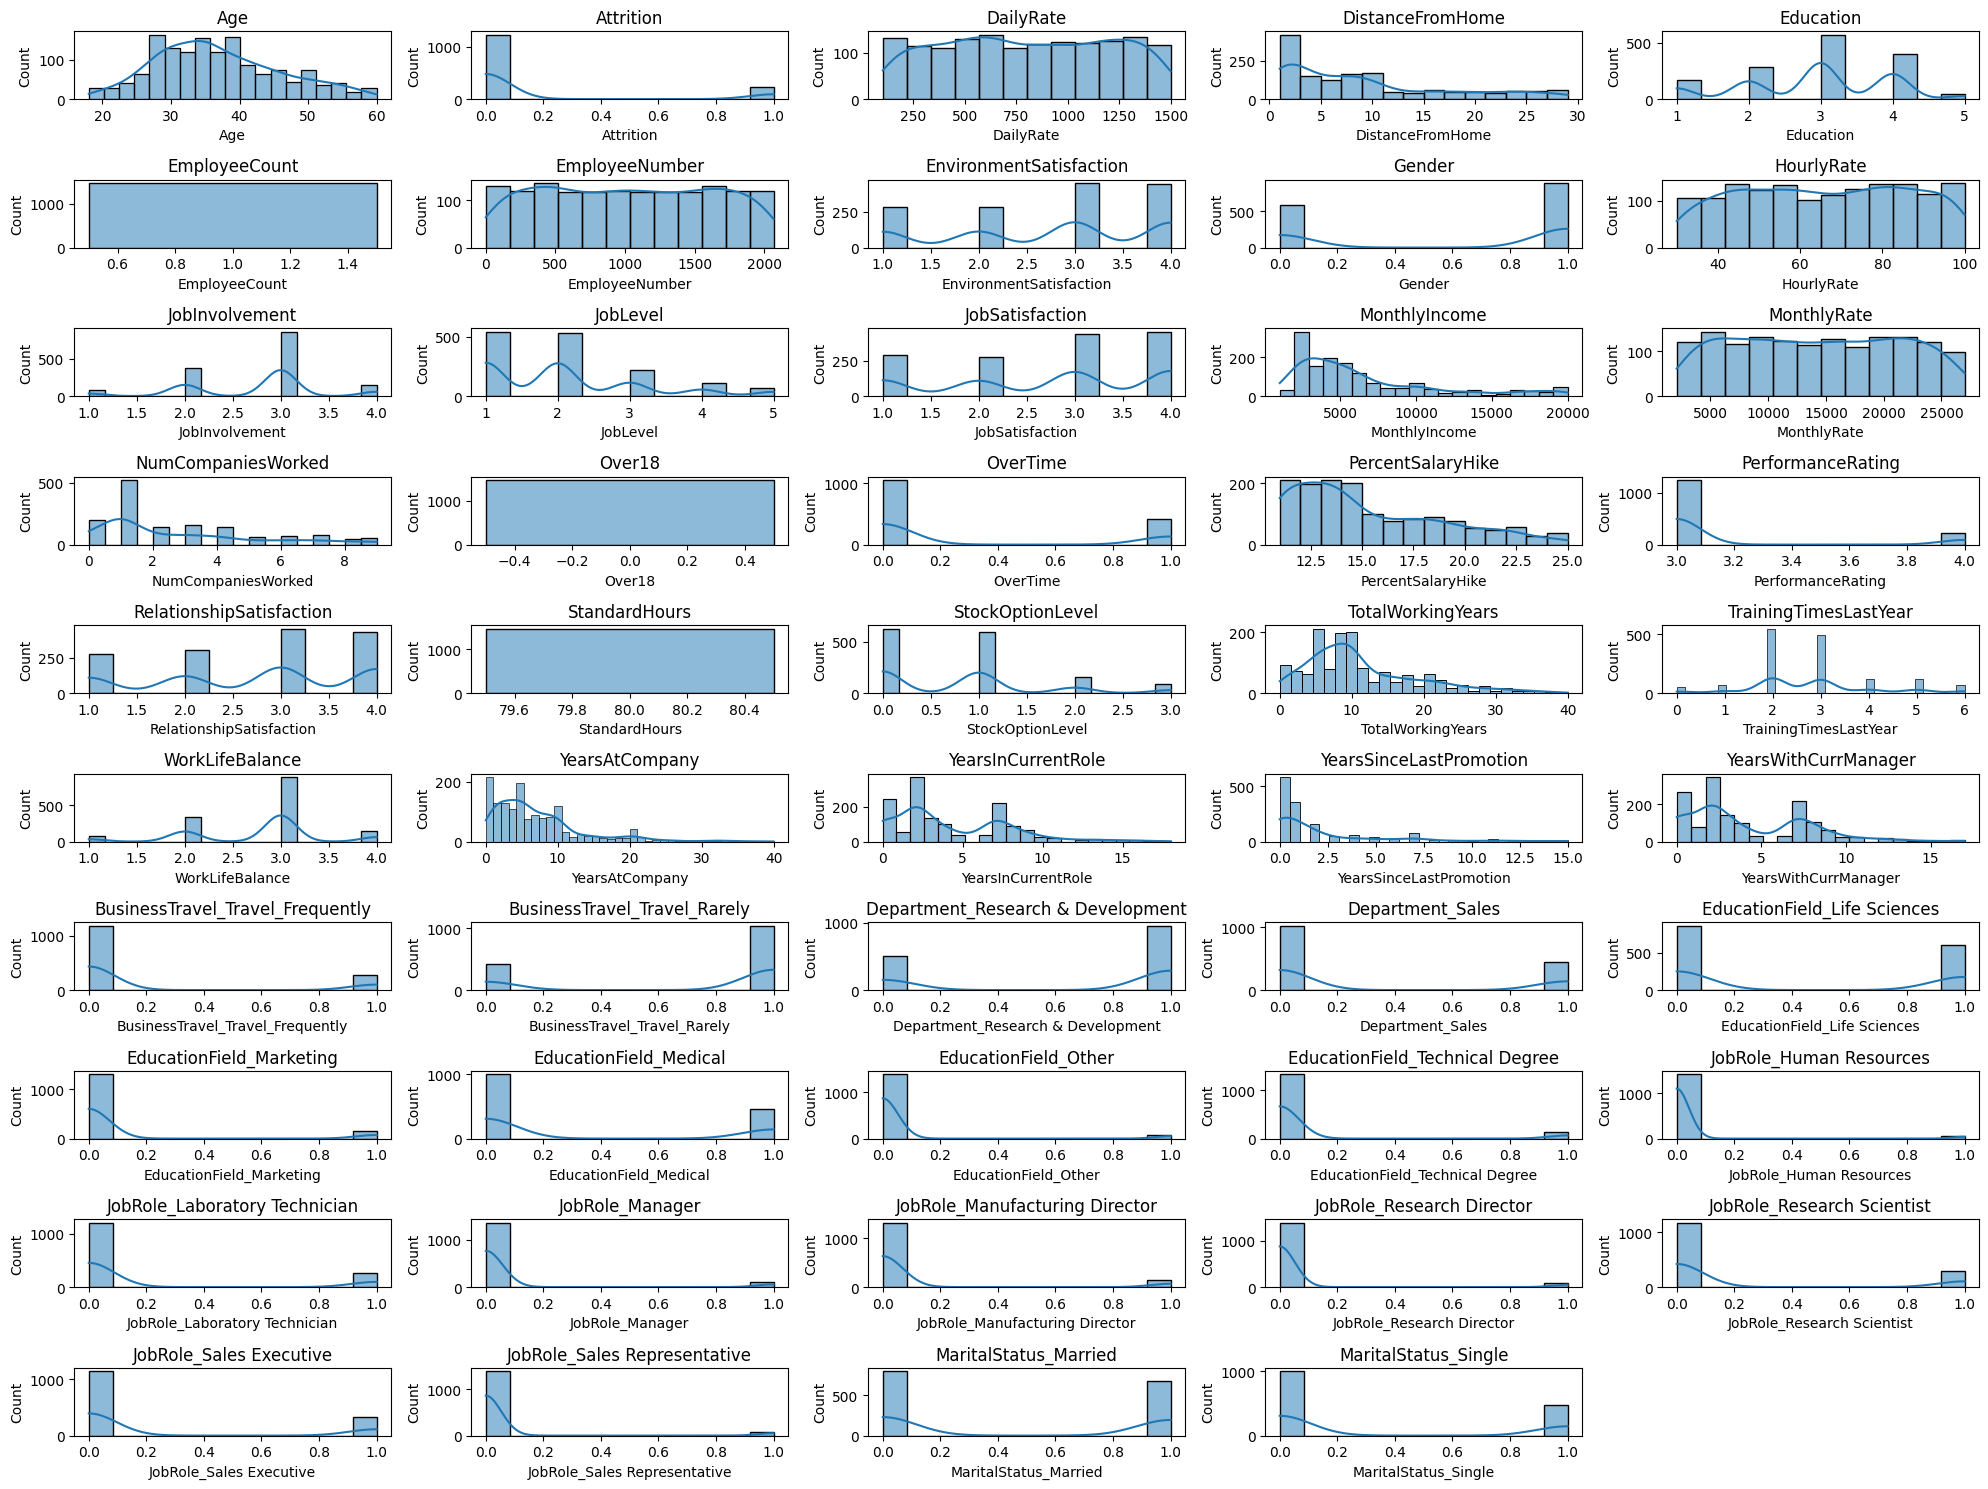

In [30]:
numerical_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(10,5, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()

Over18, EmployeeCount, and StandardHours are constants across the dataset, and EmployeeNumber is not a useful feature for determining employee attrition in the company.

In [31]:
df.drop(['Over18','EmployeeNumber','EmployeeCount','StandardHours'], axis=1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   Gender                             1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

Now that all features are of type int64 and none of them have any null values, it's a good sign to start building our model.







Text(0.5, 1.0, 'Correlation Heatmap')

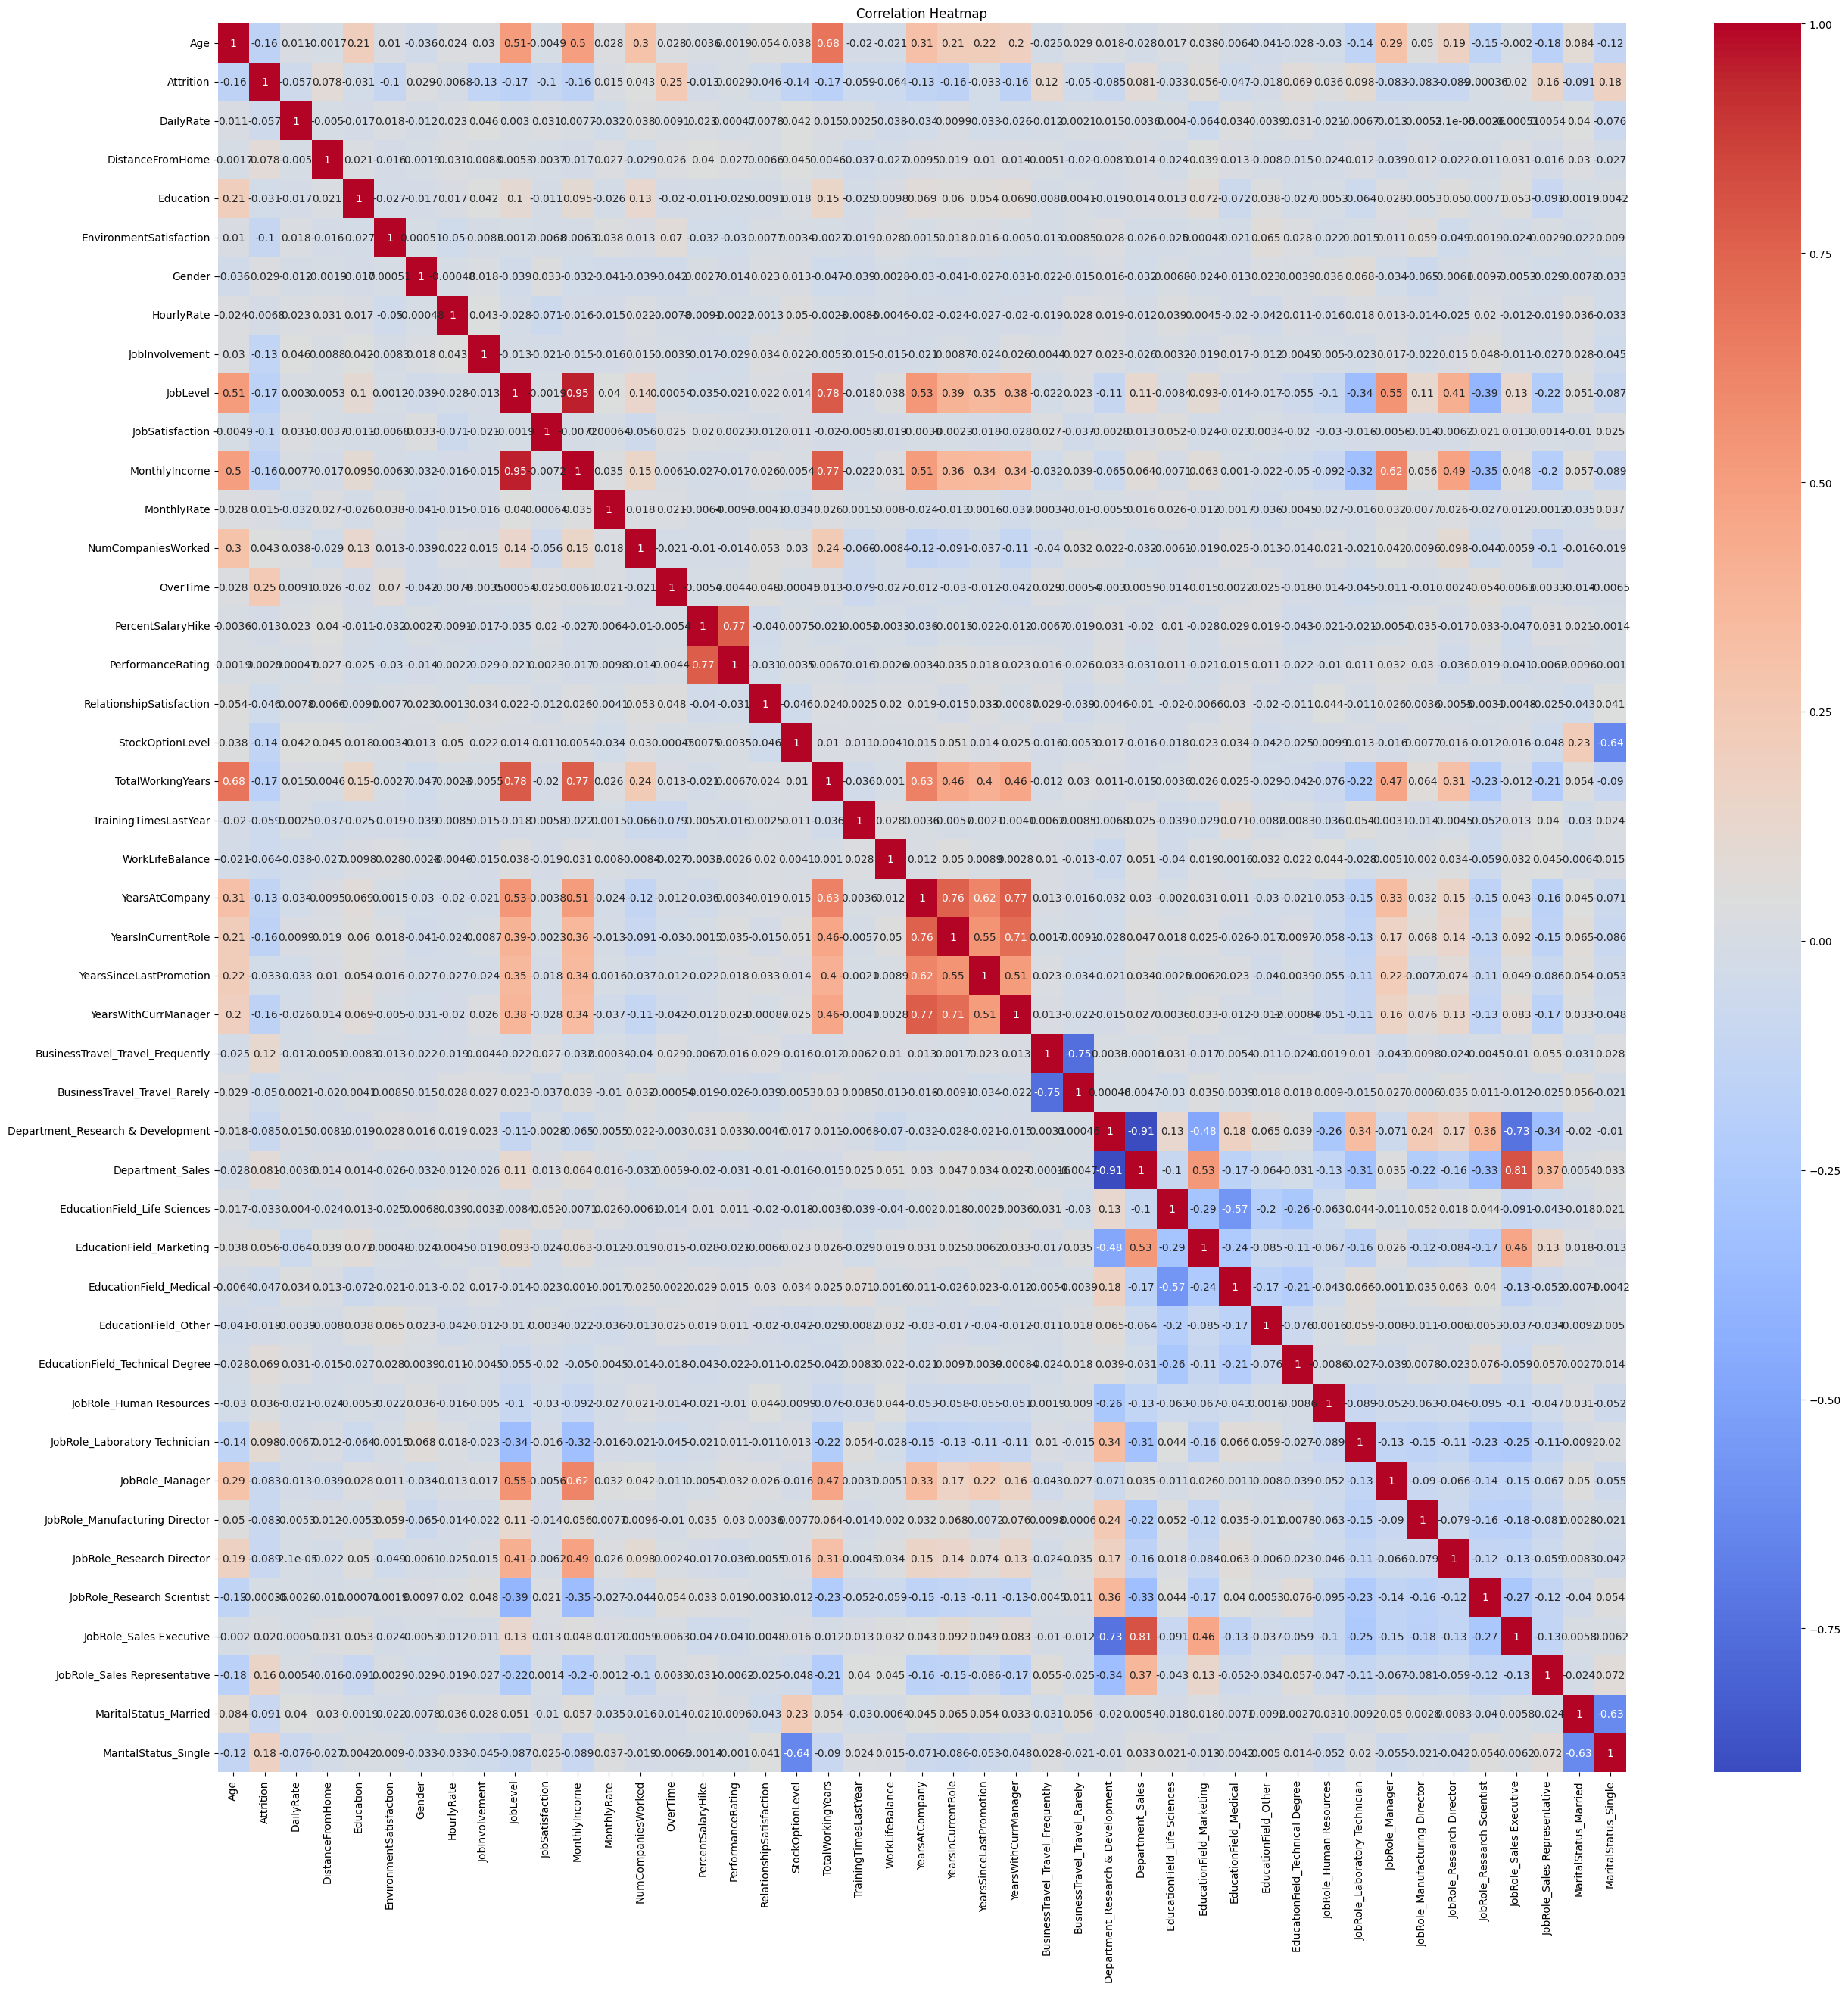

In [33]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [34]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

We can see that the Attrition data is highly imbalanced. So, let's use SMOTE technique to generate synthetic samples for the minority class which is (Attrition='Y')

In [35]:
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [36]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

#### Balancing the data:

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [38]:
print("Before Smoote:\n" , y.value_counts())
print()
print("After Smoote:\n" , y_smote.value_counts())

Before Smoote:
 Attrition
0    1233
1     237
Name: count, dtype: int64

After Smoote:
 Attrition
1    1233
0    1233
Name: count, dtype: int64


#### Split the Data into Training and Test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [40]:
y_train.value_counts()

Attrition
1    989
0    983
Name: count, dtype: int64

#### Standardization:


In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelling:

#### Logistic Regression

In [42]:
log_reg = LogisticRegression()

In [43]:
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [44]:
best_log_reg = grid_search.best_estimator_
print("\nBest Logistic Regression after Hyperparameter Tuning:")
print(best_log_reg)


Best Logistic Regression after Hyperparameter Tuning:
LogisticRegression(C=1, solver='liblinear')


In [45]:
y_pred_log_reg= best_log_reg.predict(X_test)

In [46]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))

print("Logistic Regression Accuracy")
log_acc=accuracy_score(y_test, y_pred_log_reg)
print(log_acc)

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       250
           1       0.91      0.87      0.89       244

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494

Logistic Regression Accuracy
0.8967611336032388


Text(50.722222222222214, 0.5, 'Actual')

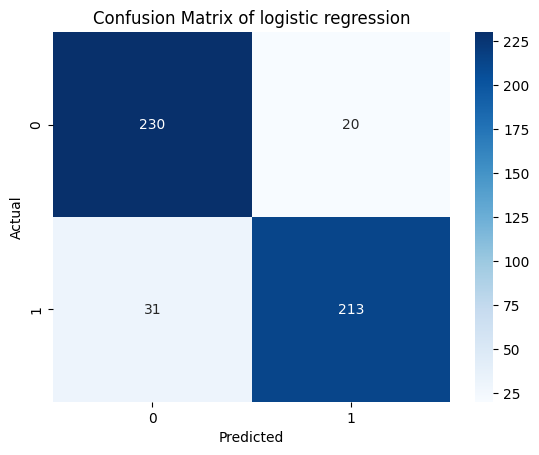

In [47]:
ax1= sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
ax1.set_title('Confusion Matrix of logistic regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

Text(0, 0.5, 'True Positive Rate')

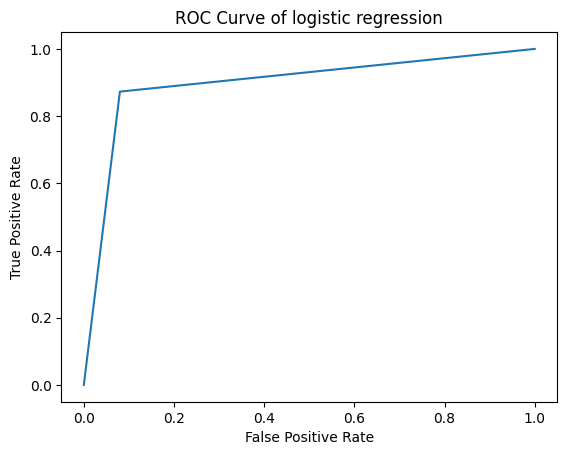

In [48]:
fpr, tpr, _= roc_curve(y_test, y_pred_log_reg)
auc= roc_auc_score(y_test, y_pred_log_reg)
ax2= plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
plt.title('ROC Curve of logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Random Forest Classifier

In [49]:
rf= RandomForestClassifier()

In [50]:
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [51]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [52]:
best_model_rf = grid_search_rf.best_estimator_
print(f"Best Random Forest after Randomized Search: {best_model_rf}")

Best Random Forest after Randomized Search: RandomForestClassifier(max_depth=20, n_estimators=200)


In [53]:
y_pred_rf= best_model_rf.predict(X_test)

In [54]:
print("\nRandom Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Accuracy")
rf_accuracy= accuracy_score(y_test, y_pred_rf)
print(rf_accuracy)


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       250
           1       0.95      0.88      0.91       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

Random Forest Accuracy
0.917004048582996


Text(50.722222222222214, 0.5, 'Actual')

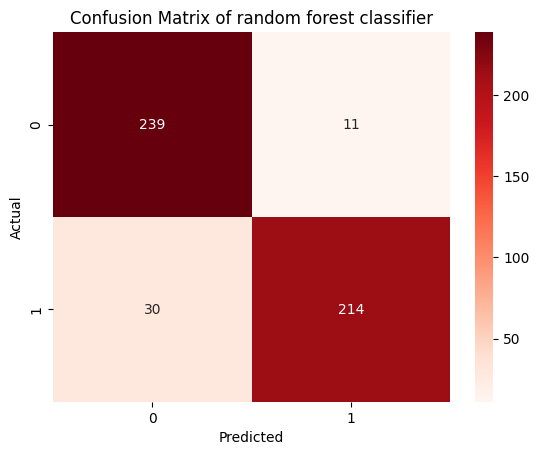

In [55]:
ax1= sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Reds')
ax1.set_title('Confusion Matrix of random forest classifier')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

Text(0, 0.5, 'True Positive Rate')

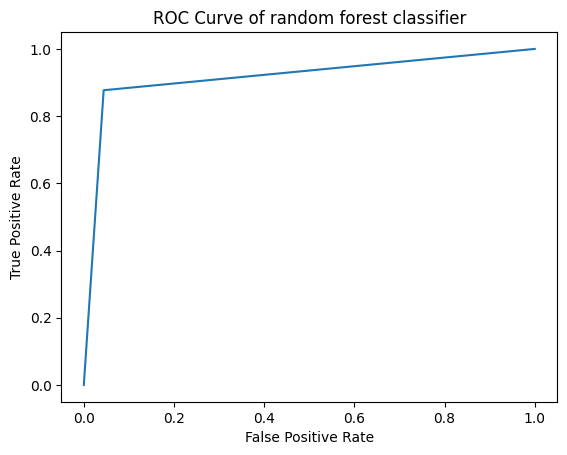

In [56]:
fpr, tpr, _= roc_curve(y_test, y_pred_rf)
auc= roc_auc_score(y_test, y_pred_rf)
ax2= plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
plt.title('ROC Curve of random forest classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### Support Vector Machine Classifier

In [57]:
from sklearn.svm import SVC

svm = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, n_iter=16,cv=5, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=16,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf']},
                   random_state=42, scoring='accuracy')

In [58]:
print("Best Parameters found: ", random_search.best_params_)
print("Best Cross-validation accuracy score: {:.2f}".format(random_search.best_score_))

Best Parameters found:  {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
Best Cross-validation accuracy score: 0.91


In [59]:
best_model = random_search.best_estimator_
y_pred_svm = best_model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy on test set: {:.2f}".format(accuracy))

Accuracy on test set: 0.92


In [61]:
print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))

print("SVM Accuracy")
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(svm_accuracy)

SVM Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       250
           1       0.94      0.90      0.92       244

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494

SVM Accuracy
0.9210526315789473


Text(50.722222222222214, 0.5, 'Actual')

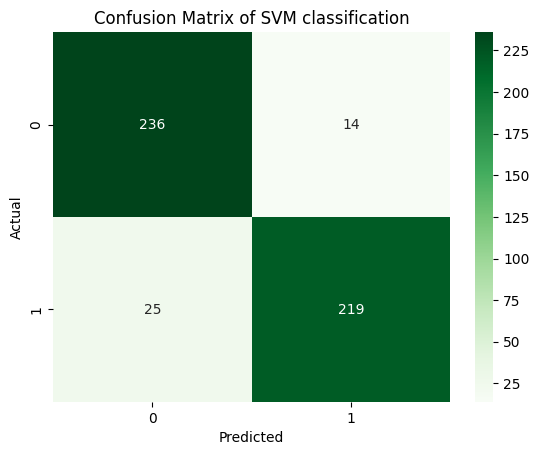

In [62]:
ax1= sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens')
ax1.set_title('Confusion Matrix of SVM classification')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

Text(0, 0.5, 'True Positive Rate')

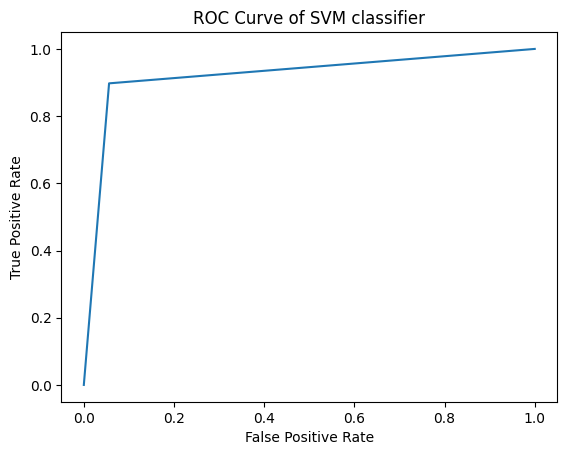

In [63]:
fpr, tpr, _= roc_curve(y_test, y_pred_svm)
auc= roc_auc_score(y_test, y_pred_svm)
ax2= plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
plt.title('ROC Curve of SVM classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### XGBoost Classifier

In [64]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [65]:
print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))

print("XGBoost Accuracy")
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(xgb_accuracy)

XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       250
           1       0.95      0.91      0.93       244

    accuracy                           0.94       494
   macro avg       0.94      0.93      0.94       494
weighted avg       0.94      0.94      0.94       494

XGBoost Accuracy
0.9352226720647774


Text(50.722222222222214, 0.5, 'Actual')

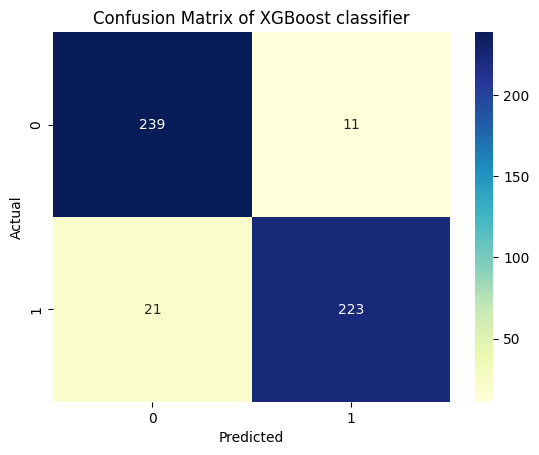

In [66]:
ax1= sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='YlGnBu')
ax1.set_title('Confusion Matrix of XGBoost classifier')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

Text(0, 0.5, 'True Positive Rate')

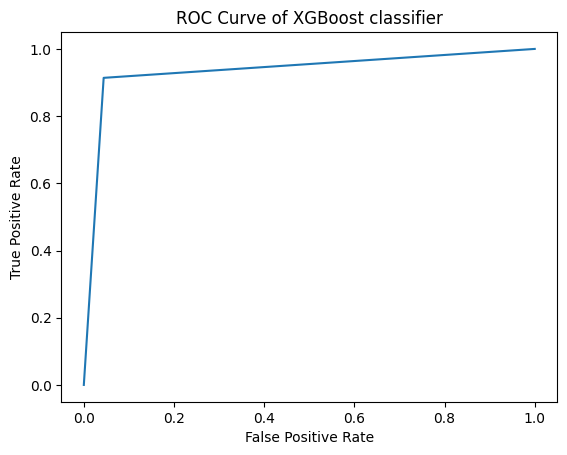

In [67]:
fpr, tpr, _= roc_curve(y_test, y_pred_xgb)
auc= roc_auc_score(y_test, y_pred_xgb)
ax2= plt.plot(fpr, tpr, label='AUC = %0.2f' % auc)
plt.title('ROC Curve of XGBoost classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### ANN model


In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [69]:
ann = Sequential()
ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dropout(0.5))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dropout(0.5))
ann.add(Dense(units=1, activation='sigmoid'))

In [70]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

y_pred_ann = (ann.predict(X_test) > 0.5).astype("int32")

Epoch 1/50
50/50 [==============================] - 1s 8ms/step - loss: 0.6797 - accuracy: 0.6164 - val_loss: 0.5456 - val_accuracy: 0.7671
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.7134 - val_loss: 0.4526 - val_accuracy: 0.8532
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4971 - accuracy: 0.7711 - val_loss: 0.3861 - val_accuracy: 0.8861
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4385 - accuracy: 0.7996 - val_loss: 0.3421 - val_accuracy: 0.8861
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8472 - val_loss: 0.3149 - val_accuracy: 0.8835
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3620 - accuracy: 0.8599 - val_loss: 0.2948 - val_accuracy: 0.8835
Epoch 7/50
50/50 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8656 - val_loss: 0.2874 - val_accuracy: 0.8861
Epoch 8/50
50/50 [==

In [72]:
print("ANN Classification Report")
print(classification_report(y_test, y_pred_ann))
print("ANN Confusion Matrix")
print(confusion_matrix(y_test, y_pred_ann))
print("ANN Accuracy")
ann_acc= accuracy_score(y_test, y_pred_ann)
print(ann_acc)

ANN Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       250
           1       0.96      0.86      0.91       244

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494

ANN Confusion Matrix
[[242   8]
 [ 34 210]]
ANN Accuracy
0.9149797570850202


#### Summary of models

In [73]:
accuracies = {}

accuracies['Logistic_regression'] = log_acc
accuracies['Random_forest_classifier'] = rf_accuracy
accuracies['SVM_Classifier'] = svm_accuracy
accuracies['XGBoost_Classifier'] = xgb_accuracy
accuracies['ANN_model'] = ann_acc

In [74]:
for model, accuracy in accuracies.items():
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy}")
    print("\n")

Model: Logistic_regression
Accuracy: 0.8967611336032388


Model: Random_forest_classifier
Accuracy: 0.917004048582996


Model: SVM_Classifier
Accuracy: 0.9210526315789473


Model: XGBoost_Classifier
Accuracy: 0.9352226720647774


Model: ANN_model
Accuracy: 0.9149797570850202


